**TITLE: PREDICTION OF OUTCOME OF THE PREVIOUS MARKETING CAMPAIGN WHETHER IT WAS A FAILURE, NON-EXISTENCE, OR SUCCESS WITH THE HELP OF MULTI-LAYER PERCEPTRON USING KERAS**

**INTRODUCTION**

**INTUTION BEHIND WORKING OF NEURAL NETWORK**

It takes several inputs, processes it through multiple neurons from multiple hidden layers, and returns the result using an output layer. This result estimation process is technically known as “Forward Propagation“.

Next, we compare the result with actual output. The task is to make the output to the neural network as close to the actual (desired) output. Each of these neurons is contributing some error to the final output. How do you reduce the error?

We try to minimize the value/ weight of neurons that are contributing more to the error and this happens while traveling back to the neurons of the neural network and finding where the error lies. This process is known as “Backward Propagation“.

In order to reduce this number of iterations to minimize the error, the neural networks use a common algorithm known as “Gradient Descent”, which helps to optimize the task quickly and efficiently.

This is how Neural networks work.

**MULTILAYER PERCEPTRON AND IT'S BASIC**

Just like atoms form the basics of any material on earth – the basic forming unit of a neural network is a perceptron. So, what is a perceptron?

A perceptron can be understood as anything that takes multiple inputs and produces one output. F

The next logical question is what is the relationship between input and output? Let us start with basic ways and build on to find more complex ways.

Below, are discussed three ways of creating input-output relationships:

1. By directly combining the input and computing the output based on a threshold value. for eg: Take x1=0, x2=1, x3=1 and setting a threshold =0. So, if x1+x2+x3>0, the output is 1 otherwise 0. You can see that in this case, the perceptron calculates the output as 1.

2. Next, let us add weights to the inputs. Weights give importance to an input. For example, you assign w1=2, w2=3, and w3=4 to x1, x2, and x3 respectively. To compute the output, we will multiply input with respective weights and compare with threshold value as w1*x1 + w2*x2 + w3*x3 > threshold. These weights assign more importance to x3 in comparison to x1 and x2.

3. Next, let us add bias: Each perceptron also has a bias which can be thought of as how much flexible the perceptron is. It is somehow similar to the constant b of a linear function y = ax + b. It allows us to move the lineup and down to fit the prediction with the data better. Without b the line will always go through the origin (0, 0) and you may get a poorer fit. For example, a perceptron may have two inputs, in that case, it requires three weights. One for each input and one for the bias. Now linear representation of input will look like, w1*x1 + w2*x2 + w3*x3 + 1*b.

But, all of this is still linear which is what perceptrons used to be. But that was not as much fun. So, people thought of evolving a perceptron to what is now called as an artificial neuron. A neuron applies non-linear transformations (activation function) to the inputs and biases.

**MULTI-LAYER PERCEPTRON**

Now, let’s move on to the next part of Multi-Layer Perceptron. So far, we have seen just a single layer consisting of 3 input nodes i.e x1, x2, and x3, and an output layer consisting of a single neuron. But, for practical purposes, the single-layer network can do only so much. An MLP consists of multiple layers called Hidden Layers stacked in between the Input Layer and the Output Layer.

The above we are talking about just a single hidden layer but in practice can contain multiple hidden layers. In addition, another point to remember in case of an MLP is that all the layers are fully connected i.e every node in a layer(except the input and the output layer) is connected to every node in the previous layer and the following layer.

**OBJECTIVES**

Here, in this analysis our main objective is to perform a,

To to perform a multiclass classification of the previous marketing campaign that whether it was a success, faliure or non-existence in marketing campaigns of a Portuguese banking institution with the help of multilayer perceptron using keras.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import numpy as np
import pandas as pd

#Loading the packages and libraries required for building up the multiclass classifier.
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#Import train_test_split function
from sklearn.model_selection import train_test_split

#Import package for visualization
import seaborn as sns
import matplotlib.pyplot as plt


**METHODOLOGY**

Data Description

---



The data is related to direct marketing campaigns of a Portuguese banking institution. The dataset consists of  records of data about 16 attributes.

**Independent variables:**

age -	age of a person

job - type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

marital - marital status ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education - ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
default	categorical,nominal	has credit in default? ('no','yes','unknown')

housing	- has housing loan? ('no','yes','unknown')

loan - has personal loan? ('no','yes','unknown')

contact - contact communication type ('cellular','telephone')

month	- last contact month of year ('jan', 'feb', 'mar', …, 'nov', 'dec')

dayofweek	- last contact day of the week ('mon','tue','wed','thu','fri')

duration	-	last contact duration, in seconds. 

campaign	- number of contacts performed during this campaign and for this client (includes last contact)

pdays	- number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

previous	-	number of contacts performed before this campaign and for this client

subcription -	has the client subscribed a term deposit? ('yes','no')

**Target Variables:**

poutcome	- outcome of the previous marketing campaign ('failure','nonexistent','success')

In [ ]:
#Initialize Random Number Generator

#fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
#load dataset
dataset = pd.read_excel("/content/Banking1.xlsx")
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,subscription,poutcome
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,no,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,no,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,yes,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,no,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,no,nonexistent


In [ ]:
#Coding the categories under education.
dataset['education']=np.where(dataset['education'] =='basic.4y', 'Primary', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.6y', 'Middle', dataset['education'])
dataset['education']=np.where(dataset['education'] =='basic.9y', 'Middle', dataset['education'])

In [ ]:
from pandas.core.arrays import integer

#Coding the categories under poutcome.
dataset['poutcome']=np.where(dataset['poutcome'] =='success', '1', dataset['poutcome'])
dataset['poutcome']=np.where(dataset['poutcome'] =='failure', '0', dataset['poutcome'])
dataset['poutcome']=np.where(dataset['poutcome'] =='nonexistent', '2', dataset['poutcome'])

#Converting the target variable column to integer type.
dataset['poutcome']=dataset['poutcome'].astype(int)

Exploratory Data Analysis

---



Now we perform some basic EDA on this dataset. 

In [ ]:
#Obtaining the dimension of the dataset.
dataset.shape

(32950, 16)

It is observed that the dataset comprises of 32950 records and 16 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           32950 non-null  int64 
 1   job           32950 non-null  object
 2   marital       32950 non-null  object
 3   education     32950 non-null  object
 4   default       32950 non-null  object
 5   housing       32950 non-null  object
 6   loan          32950 non-null  object
 7   contact       32950 non-null  object
 8   month         32950 non-null  object
 9   day_of_week   32950 non-null  object
 10  duration      32950 non-null  int64 
 11  campaign      32950 non-null  int64 
 12  pdays         32950 non-null  int64 
 13  previous      32950 non-null  int64 
 14  subscription  32950 non-null  object
 15  poutcome      32950 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


From the above table, it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
dataset.describe()

,age,duration,campaign,pdays,previous,poutcome
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,1.758331
std,10.403636,258.975917,2.752326,187.951096,0.499025,0.625628
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,2.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,2.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,2.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,2.000000


From the above dataset we observe that the average age of client is 40.014112	years and we also observe that the average number of contacts performed during this campaign and for the client is 962 days and the 25 percentile is 999 i.e 25% ofclients are having performed number of contacts for less 999 days during the campaign and 75% of the of clients are having performed number of contacts for more than 999 days during the campaign.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f357f7f4590>,
      dtype=object)

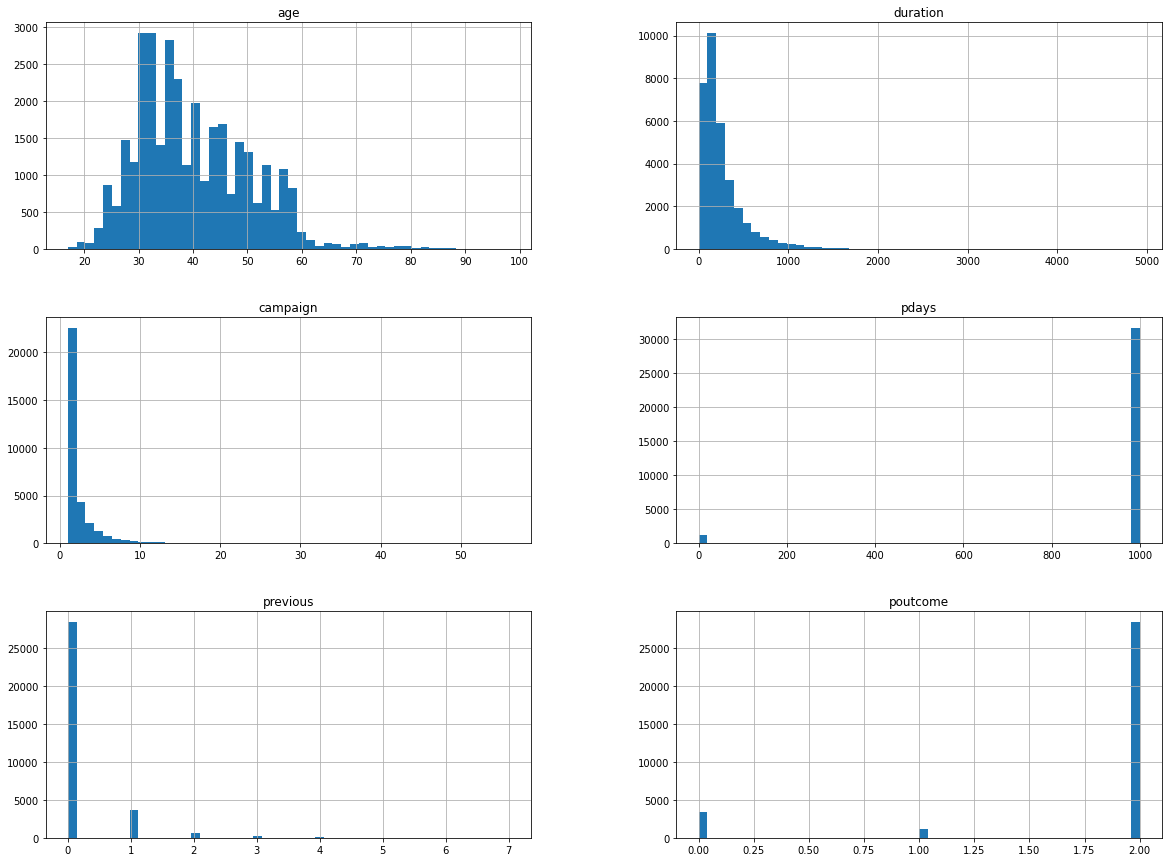

In [ ]:
#Visualize the distribution of data for every feature(For plotting histogram)
dataset.hist(bins=50, figsize=(20, 15))


Thus, the histogram for all the numerical variables are obtained.  Hereafter plotting the histogram for numerical columns, we observe that ‘age’ is almost normally distributed whereas ‘duration and campaign’ are most probably to be right-skewed.

Let’s check the correlation of all the features with each other.

Text(0.5, 1.0, '[Figure 2]')

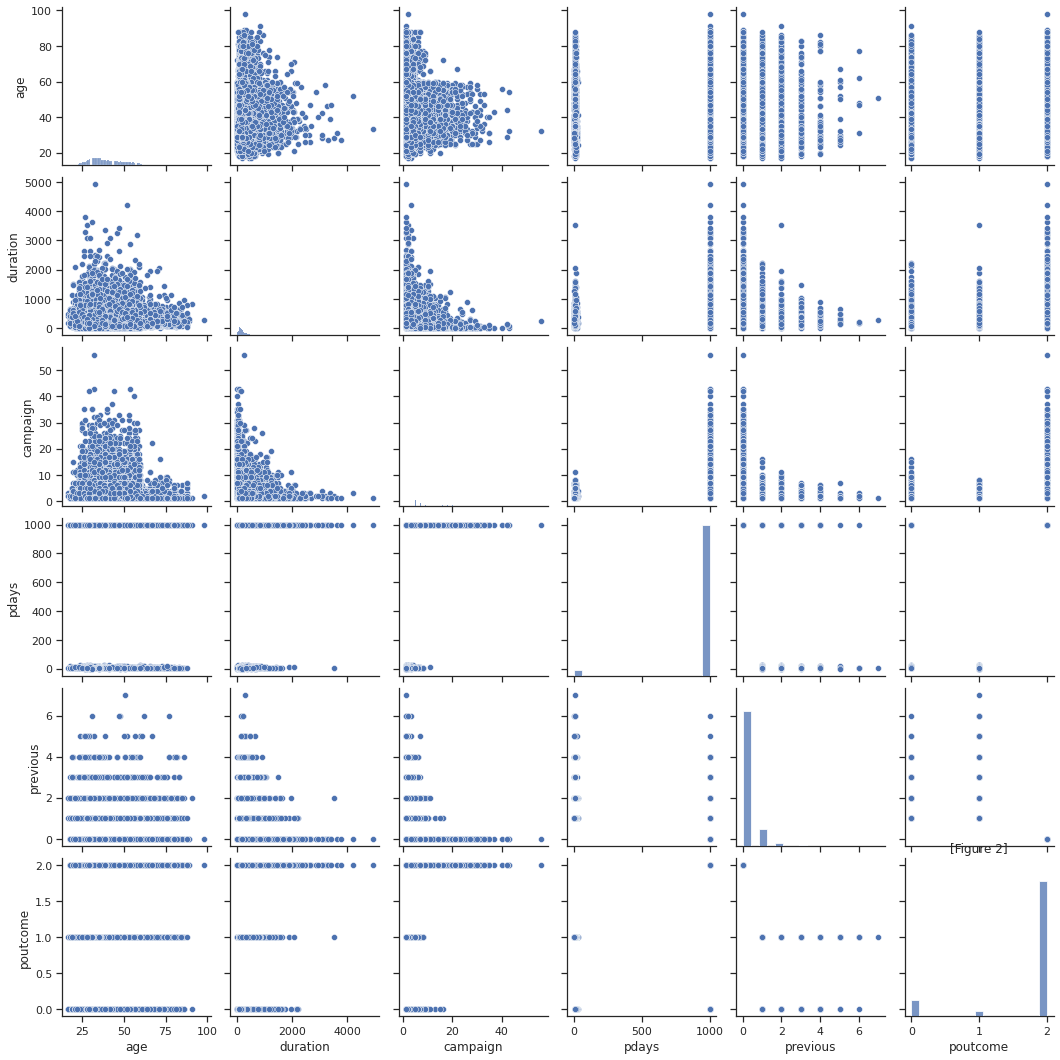

In [ ]:
#Plotting the pair plot to visualise the attributes all at once
sns.set_theme(style="ticks")
sns.pairplot(dataset)
plt.title('[Figure 2]')

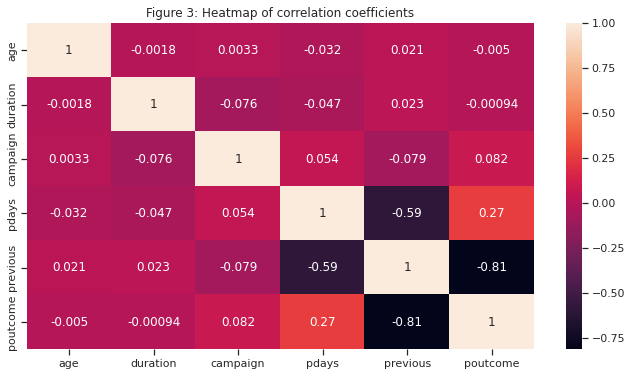

In [ ]:
#Obtaining the correlation matrix
fig=plt.figure(figsize=(25,6))
ax=fig.add_subplot(122)
sns.heatmap(dataset.corr(), annot = True)
ax.set_title("Figure 3: Heatmap of correlation coefficients")
plt.show()

From the above scatter plot and heat map  and the tables we observe that all the independent variables campaign and pdays are positively correlated with the dependent variable poutcome and age, duration, and previous are negatively related to the dependent variable poutcome. It can  also be observed that none of the independent variables are higghly correlated among each other thus, no multicolinearity.

In [ ]:
#Finding the sum of missing values per column if present
dataset.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
duration        0
campaign        0
pdays           0
previous        0
subscription    0
poutcome        0
dtype: int64

Thus there are no null values in the dataset.

In [ ]:
#Counts of each classes in study variable(status of a country)
dataset['poutcome'].value_counts()

2    28416
0     3429
1     1105
Name: poutcome, dtype: int64

Thus we observe that there are 28416 records of non existent marketing campaign, while 3429 records of failed marketing campaign and 1105 records of successful marketing campaign.

Data Preprocessing

---



In [ ]:
#Name for all categorical columns
cat_cols=[col for col in dataset.columns if dataset[col].dtypes=='O']
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'subscription']

In [ ]:
#Apply the pd.get_dummies() function
data_encode = pd.get_dummies(data = dataset, prefix = 'OHE', prefix_sep='_', columns = cat_cols, drop_first =True, dtype='int8')

In [ ]:
#Let’s verify the dummy variable process
print('Columns in original data frame:n',dataset.columns.values)
print('nNumber of rows and columns in the dataset:',dataset.shape)
print('nColumns in data frame after encoding dummy variable:n',data_encode.columns.values)
print('nNumber of rows and columns in the dataset:',data_encode.shape)

Columns in original data frame:n ['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous'
 'subscription' 'poutcome']
nNumber of rows and columns in the dataset: (32950, 16)
nColumns in data frame after encoding dummy variable:n ['age' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'OHE_blue-collar' 'OHE_entrepreneur' 'OHE_housemaid' 'OHE_management'
 'OHE_retired' 'OHE_self-employed' 'OHE_services' 'OHE_student'
 'OHE_technician' 'OHE_unemployed' 'OHE_unknown' 'OHE_married'
 'OHE_single' 'OHE_unknown' 'OHE_Primary' 'OHE_high.school'
 'OHE_illiterate' 'OHE_professional.course' 'OHE_university.degree'
 'OHE_unknown' 'OHE_unknown' 'OHE_yes' 'OHE_unknown' 'OHE_yes'
 'OHE_unknown' 'OHE_yes' 'OHE_telephone' 'OHE_aug' 'OHE_dec' 'OHE_jul'
 'OHE_jun' 'OHE_mar' 'OHE_may' 'OHE_nov' 'OHE_oct' 'OHE_sep' 'OHE_mon'
 'OHE_thu' 'OHE_tue' 'OHE_wed' 'OHE_yes']
nNumber of rows and columns in the dataset: (32950, 47)


Model Building & Analysis

---



In [ ]:
#Dropping the variables from the daataset which is not needed obtaining the subset of independent variables and asigning them to X.
X1=data_encode.drop(['poutcome'],axis=1)
X=X1.iloc[:32950]

#Extracting the variable y i.e. independent variable.
y=data_encode['poutcome']

In [ ]:
# Splitting the data in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (26360, 46)
Testing split input-  (6590, 46)


In [ ]:
#Defining and Compiling the Neural Network Model

#Defining the baseline model
def baseline_model():
#Creating the model
  model = Sequential()
  model.add(Dense(47, input_dim=46, activation= 'relu' ))
  model.add(Dense(3, activation= 'sigmoid'))
#Compiling the model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model


In [ ]:
#Create Wrapper For Neural Network Model For Use in scikit-learn.
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
#Evaluating The Model with k-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [ ]:
#Estimating Accuracy of Neural Network Model on the Banking dataset
results = cross_val_score(estimator, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 94.22% (7.29%)


Hence, we have obtained the accuracy 94.22% for the above multi class classifier to predict the outcome of the previous marketing campaign Thus we can say that the above model is good in making correct predictions for the outcome of the previous marketing campaign.

**CONCLUSION**

Thus,in the above analysis we have obtained the multiclass classifier to predict the the outcome of the previous marketing campaign  and we observe that the model  has a accuracy of 94.22% in predicting the the outcome of the previous marketing campaign  that means the 94.22% of predictions were correctly made using the above multiclass classifier.